# Proyecto
Presentado por
### Victor Manuel Dávila
### Oscar Javier Restrepo
### Daniel Lozano Barrero


In [17]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

carga de imagenes

In [21]:
cv_img = []
for img in glob.glob("img/*.jpg"):
    print(img)
    n= cv2.imread(img)
    n=cv2.cvtColor(n,cv2.COLOR_BGR2RGB)
    cv_img.append(n)

img\IMG_10A.jpg
img\IMG_10B.jpg
img\IMG_10C.jpg
img\IMG_11A.jpg
img\IMG_11B.jpg
img\IMG_11C.jpg
img\IMG_12A.jpg
img\IMG_12B.jpg
img\IMG_12C.jpg
img\IMG_13A.jpg
img\IMG_13B.jpg
img\IMG_13C.jpg
img\IMG_14A.jpg
img\IMG_14B.jpg
img\IMG_14C.jpg
img\IMG_15A.jpg
img\IMG_15B.jpg
img\IMG_15C.jpg
img\IMG_16A.jpg
img\IMG_16B.jpg
img\IMG_16C.jpg
img\IMG_17A.jpg
img\IMG_17B.jpg
img\IMG_17C.jpg
img\IMG_18A.jpg
img\IMG_18B.jpg
img\IMG_18C.jpg
img\IMG_19A.jpg
img\IMG_19B.jpg
img\IMG_19C.jpg
img\IMG_1A.jpg
img\IMG_1B.jpg
img\IMG_1C.jpg
img\IMG_20A.jpg
img\IMG_20B.jpg
img\IMG_20C.jpg
img\IMG_2A.jpg
img\IMG_2B.jpg
img\IMG_2C.jpg
img\IMG_3A.jpg
img\IMG_3B.jpg
img\IMG_3C.jpg
img\IMG_4A.jpg
img\IMG_4B.jpg
img\IMG_4C.jpg
img\IMG_5A.jpg
img\IMG_5B.jpg
img\IMG_5C.jpg
img\IMG_6A.jpg
img\IMG_6B.jpg
img\IMG_6C.jpg
img\IMG_7A.jpg
img\IMG_7B.jpg
img\IMG_7C.jpg
img\IMG_8A.jpg
img\IMG_8B.jpg
img\IMG_8C.jpg
img\IMG_9A.jpg
img\IMG_9B.jpg
img\IMG_9C.jpg


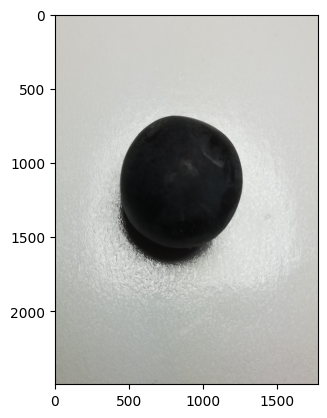

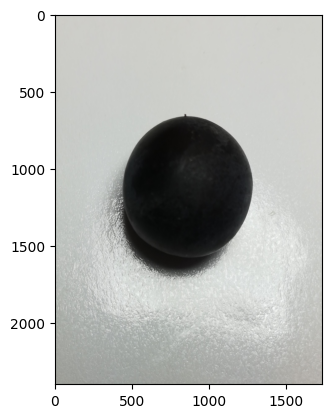

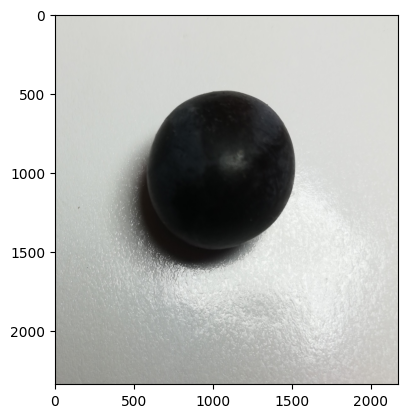

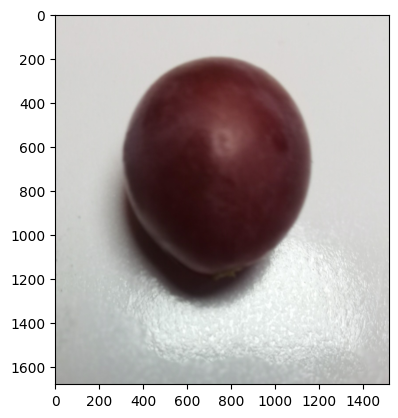

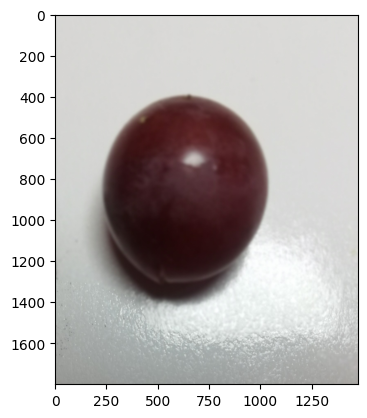

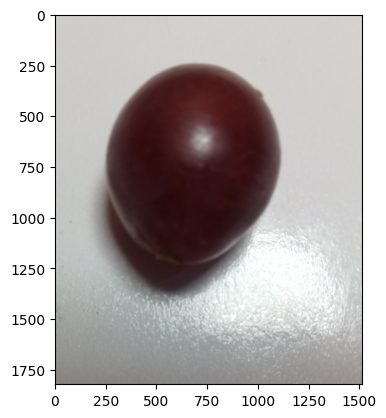

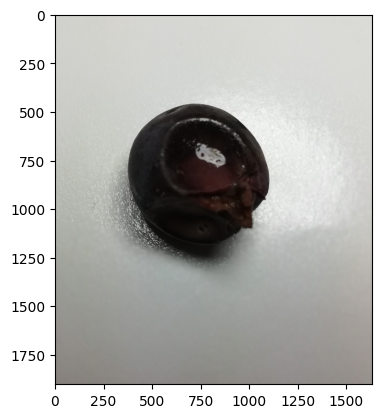

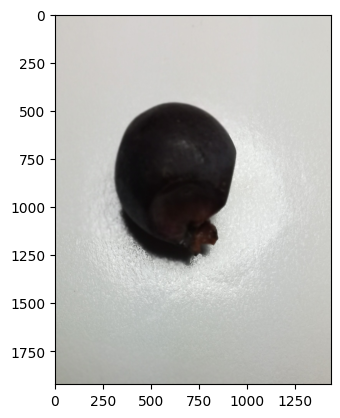

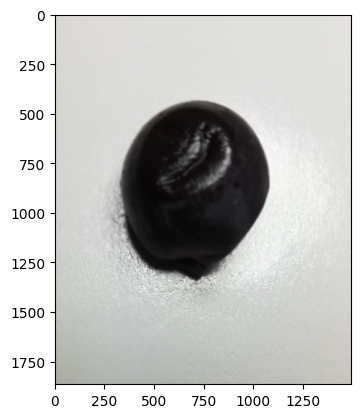

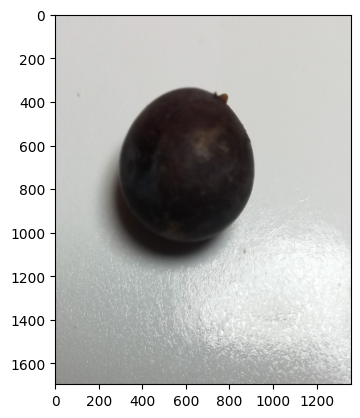

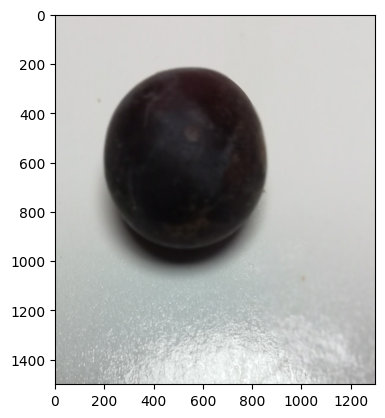

<Figure size 640x480 with 0 Axes>

In [22]:
for i,img in enumerate(cv_img):
    plt.figure()
    if i > 10:
        break
    try:
        plt.imshow(img)
    except:
        print("la imagen ", i," no se pudo cargar porque se acabo la memoria" )

In [20]:
def segmentar(img_to_seg, klim):
    image_copy = np.copy(img_to_seg)
    
    # Mostramos la imagen y esperamos que el usuario presione cualquier tecla para continuar.
    plt.imshow(img_to_seg)
    plt.figure()
    
    # Convertiremos la imagen en un arreglo de ternas, las cuales representan el valor de cada pixel. En pocas palabras,
    # estamos aplanando la imagen, volviéndola un vector de puntos en un espacio 3D.
    pixel_values = image_copy.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Abajo estamos aplicando K-Means. Como siempre, OpenCV es un poco complicado en su sintaxis, así que vamos por partes.
    
    # Definimos el criterio de terminación del algoritmo. En este caso, terminaremos cuando la última actualización de los
    # centroides sea menor a *epsilon* (cv2.TERM_CRITERIA_EPS), donde epsilon es 1.0 (último elemento de la tupla), o bien
    # cuando se hayan completado 10 iteraciones (segundo elemento de la tupla, criterio cv2.TERM_CRITERIA_MAX_ITER).
    stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    
    # Este es el número de veces que se correrá K-Means con diferentes inicializaciones. La función retornará los mejores
    # resultados.
    number_of_attempts = 10
    
    # Esta es la estrategia para inicializar los centroides. En este caso, optamos por inicialización aleatoria.
    centroid_initialization_strategy = cv2.KMEANS_RANDOM_CENTERS
    
    # Ejecutamos K-Means con los siguientes parámetros:
    # - El arreglo de pixeles.
    # - K o el número de clusters a hallar.
    # - None indicando que no pasaremos un arreglo opcional de las mejores etiquetas.
    # - Condición de parada.
    # - Número de ejecuciones.
    # - Estrategia de inicialización.
    #
    # El algoritmo retorna las siguientes salidas:
    # - Un arreglo con la distancia de cada punto a su centroide. Aquí lo ignoramos.
    # - Arreglo de etiquetas.
    # - Arreglo de centroides.
    for k in range(1,klim+1):

        _, labels, centers = cv2.kmeans(pixel_values,
                                        k,
                                        None,
                                        stop_criteria,
                                        number_of_attempts,
                                        centroid_initialization_strategy)
        
        # Aplicamos las etiquetas a los centroides para segmentar los pixeles en su grupo correspondiente.
        centers = np.uint8(centers)
        segmented_data = centers[labels.flatten()]
        
        # Debemos reestructurar el arreglo de datos segmentados con las dimensiones de la imagen original.
        segmented_image = segmented_data.reshape(image_copy.shape)
        
        # Mostramos la imagen segmentada resultante.
        plt.imshow(segmented_image)
        plt.title("k={}".format(k))
        plt.figure()

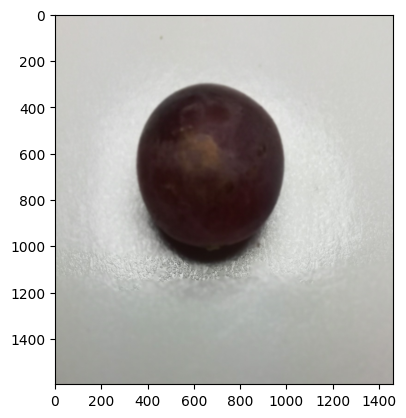

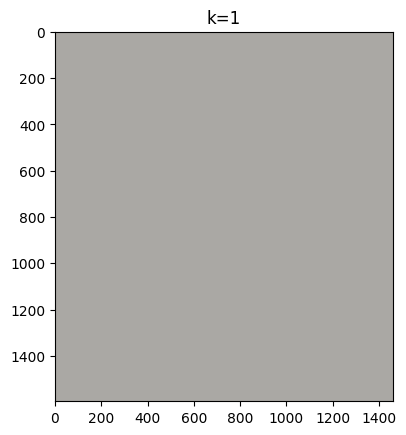

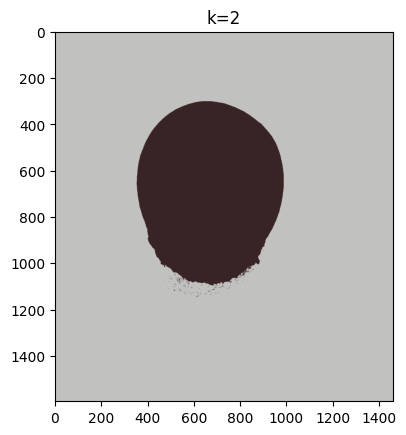

<Figure size 640x480 with 0 Axes>

In [25]:

#segmentar(cv_img[13],2) #uva verde que se queda con la sombra
segmentar(cv_img[18],2)